# 🎬 Netflix Movies Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load and Preview

In [2]:
# Load dataset

df = pd.read_csv("mymoviedb.csv", engine="python",on_bad_lines='skip')

## 2. Missing Values and

In [3]:
# Preview data


display(df.head())
print()  # blank line

display(df.info())
print()  # blank line

# Check for missing values
display("\nMissing Values:\n", df.isnull().sum())

# Data types
display("\nData Types:\n", df.dtypes)



,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


None

'\nMissing Values:\n'

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

'\nData Types:\n'

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count            object
Vote_Average          object
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object

In [4]:

display(df.describe(include='all'))

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
count,9837,9828,9828,9827.000000,9827,9827,9827,9826,9826
unique,5903,9514,9823,NaN,3267,75,44,2337,9826
top,2022-03-10,Beauty and the Beast,The Kingdom of the People of the Earth once ru...,NaN,0,6.4,en,Drama,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
freq,16,4,2,NaN,100,435,7569,466,1
mean,NaN,NaN,NaN,40.320570,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,108.874308,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,16.127500,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.191000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,35.174500,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Strip whitespace
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [6]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'],errors='coerce')
df['Vote_Count'] = df['Vote_Count'].fillna(0).astype(int)

In [7]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'],errors='coerce')
df['Vote_Average'] = df['Vote_Average'].fillna(0).astype(float)


In [8]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


## 3. Numeric Columns Distribution

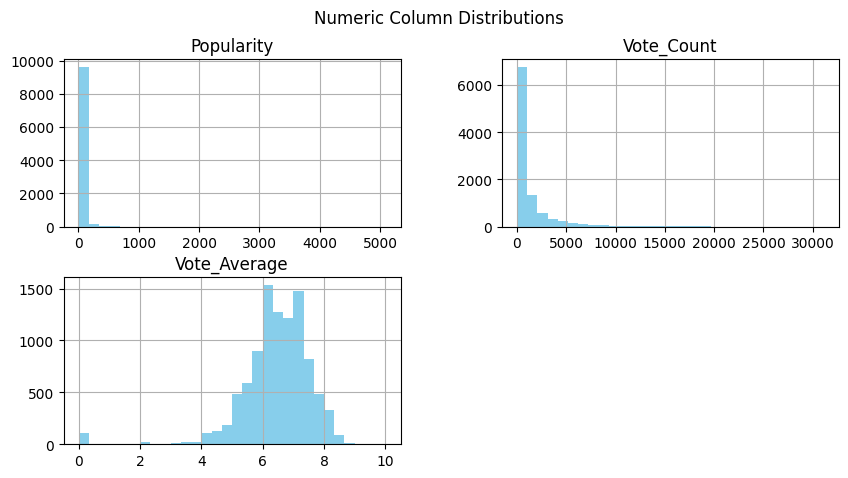

In [9]:
# Numeric columns distribution
# -------------------------
num_cols = ['Popularity', 'Vote_Count', 'Vote_Average']
df[num_cols].hist(figsize=(10, 5), bins=30, color='skyblue')
plt.suptitle("Numeric Column Distributions")
plt.show()

## 4. Language Distribution

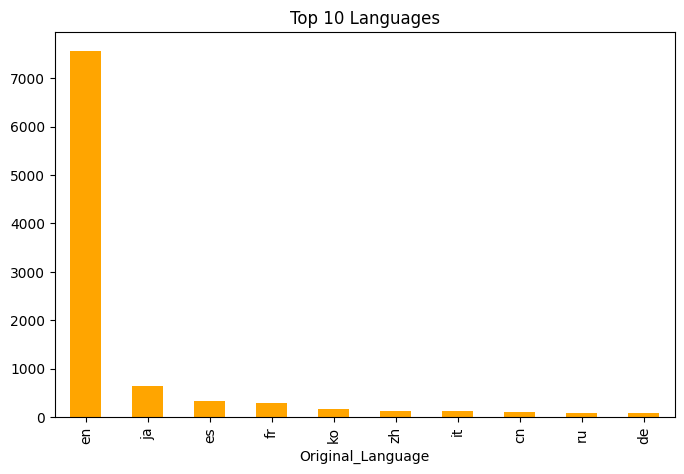

In [10]:
# Categorical columns analysis
# -------------------------
# Language count
plt.figure(figsize=(8,5))
df['Original_Language'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Languages")
plt.show()


## 5. Genre Distribution

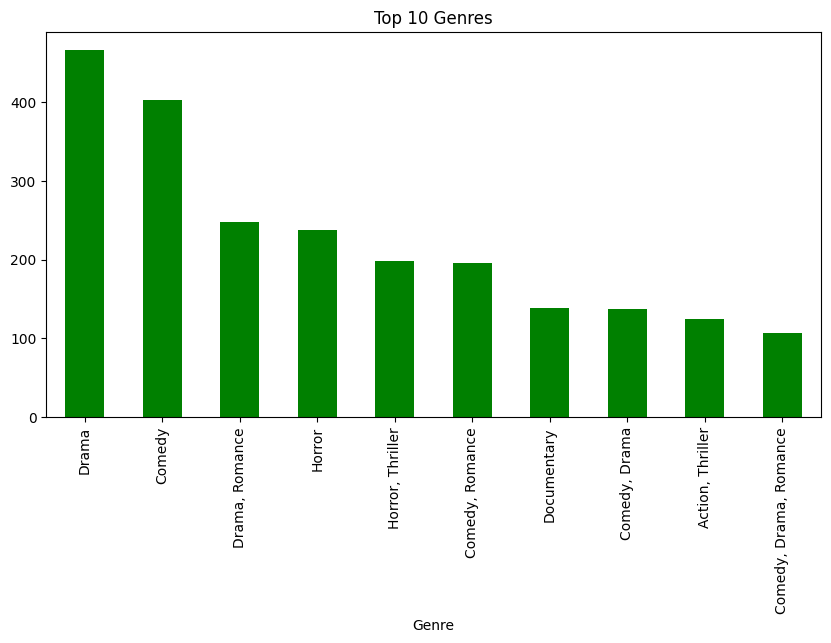

In [11]:
# Genre count
plt.figure(figsize=(10,5))
df['Genre'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Genres")
plt.show()


## 6. Correlation Heatmap

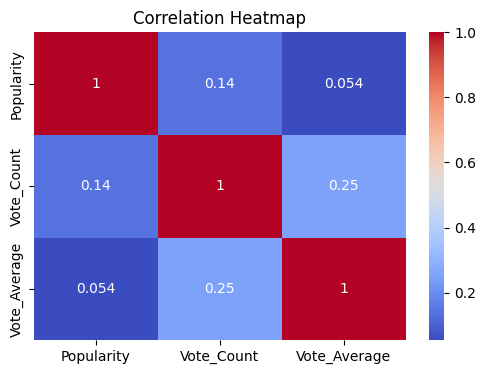

In [12]:
# Correlation heatmap
# -------------------------
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 7. Outlier Detection

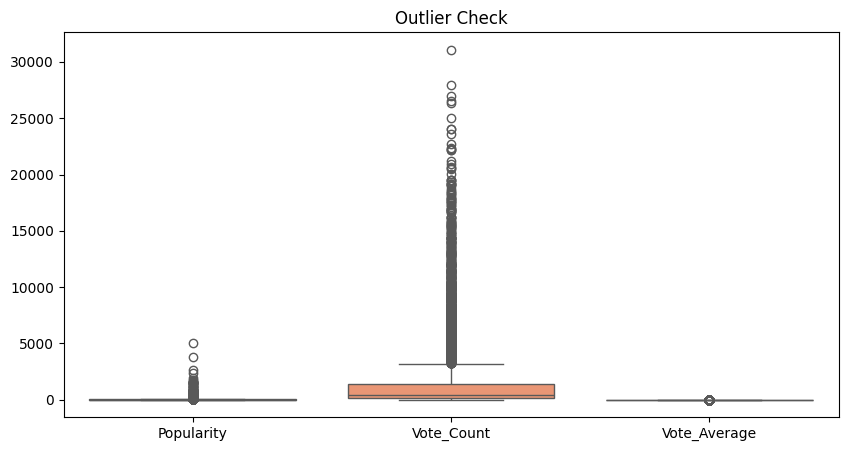

In [13]:
# Outlier detection (Popularity & Vote Count)
# -------------------------
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols], palette='Set2')
plt.title("Outlier Check")
plt.show()

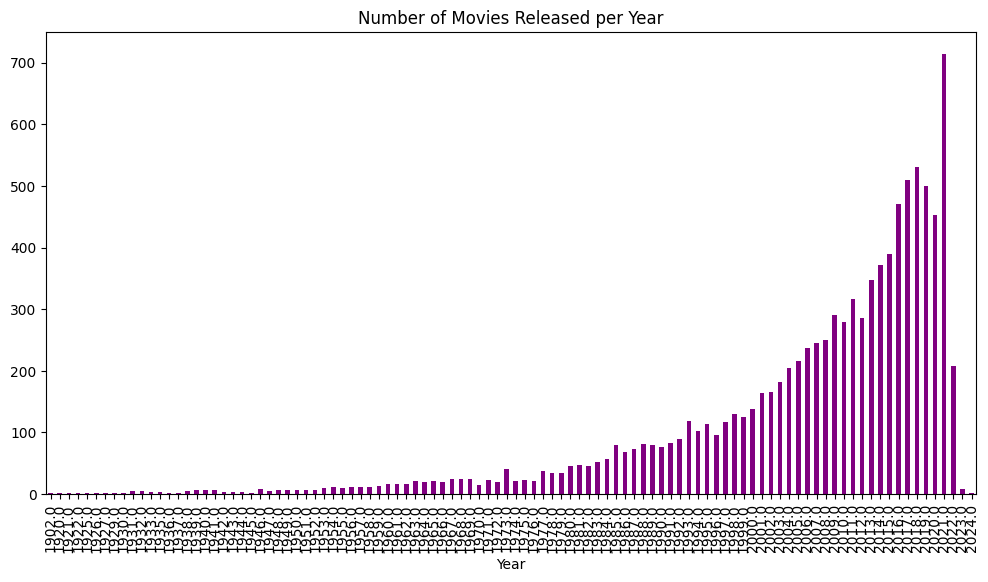

In [14]:
df['Year'] = df['Release_Date'].dt.year
plt.figure(figsize=(12,6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Number of Movies Released per Year")
plt.show()


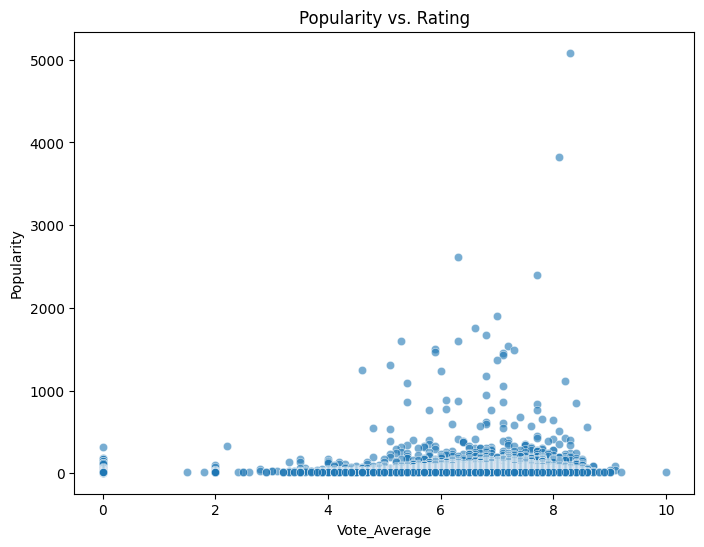

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Vote_Average', y='Popularity', alpha=0.6)
plt.title("Popularity vs. Rating")
plt.show()


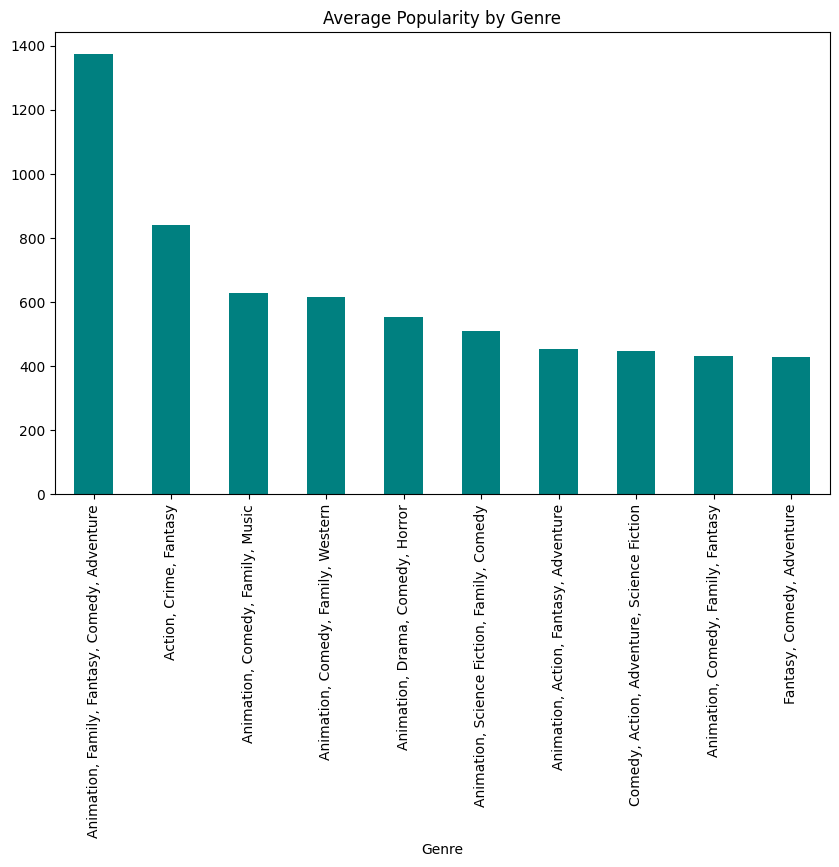

In [16]:
genre_popularity = df.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
genre_popularity.head(10).plot(kind='bar', color='teal')
plt.title("Average Popularity by Genre")
plt.show()
